# tutorial

A. link to helpful python docs

Recapitation, Simplification, and Mutation: https://pyslim.readthedocs.io/en/latest/tutorial.html#recapitation-simplification-and-mutation

Saving Individuals in .trees file: https://pyslim.readthedocs.io/en/latest/tutorial.html#obtaining-and-saving-individuals

Some Basic Plotting:
https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
(Esther's note: I'm not sure if this site is reliable but it helped me, so feel free to remove!)

B. Which packages you need and what they do and link to docs

What is pyslim + how to install: https://pypi.org/project/pyslim/

What is tskit: https://tskit.dev/tskit/docs/stable/introduction.html
    + Install tskit: https://tskit.dev/tskit/docs/stable/installation.html

What is NumPy, install, import: https://numpy.org/doc/stable/user/absolute_beginners.html

What is Msprime: https://tskit.dev/msprime/docs/stable/quickstart.html
    + Install Msprime: https://tskit.dev/msprime/docs/stable/installation.html#sec-installation

Install IPython: https://ipython.org/install.html
	(SVG from IPython.display allows us to display trees in SVG format)
    
What is Matplotlib: https://matplotlib.org/stable/index.html
    + Install Matplotlib: https://matplotlib.org/stable/users/installing.html
    (We can use things like matplotlib.pyplot as plt for plotting, matplotlib.cm as cm 
    for color maps, and various widgets)

In [1]:
#We can import these packages in our notebooks like this:
import pyslim, tskit
import numpy as np
import msprime
from IPython.display import SVG #for displaying trees in svg format
import matplotlib
import matplotlib.pyplot as plt #plotting
import matplotlib.cm as cm #color maps
%matplotlib inline

In [2]:
import os #module to run commands on the code line from within python
SLiM = 'slim' #command to run SLiM from your command line

# BASICS

## 0. run a slim sim (Matt)

We first write out our SLiM script as text

In [5]:
SLiM_script = """
initialize() {

   setSeed(1);                                    // set seed for repeatability
   initializeSLiMModelType("nonWF");              // non-Wright-Fisher to allow for local density-dependence and prevent clumping
   initializeSLiMOptions(dimensionality="xy");    // 2 dimensions
   initializeTreeSeq(retainCoalescentOnly=F);     // keep all ancestors that remain in tree sequence
   initializeMutationRate(0.0);                   // we will ignore mutations for now and just deal with the trees
   initializeMutationType("m1", 0.5, "f", 0.0);
   initializeGenomicElementType("g1", m1, 1.0);
   initializeGenomicElement(g1, 0, 999999);       // 1Mb chromosome
   initializeRecombinationRate(1e-8);             // some recombination so we get multiple trees

   // parameter values
   defineConstant("LAMBDA", 4.0); // birth rate
   defineConstant("K", 2.0);      // carrying capacity per unit area
   defineConstant("W", 10);       // width and height of the area
   defineConstant("SIGMA", 0.1);  // interaction and dispersal distance
   
   // spatial interaction for local competition
   initializeInteractionType("i1", "xy", reciprocal=T, maxDistance = 10 * SIGMA);  // interaction for both mate choice and density dependence
   i1.setInteractionFunction("n", 1.0/(2*PI*SIGMA^2), SIGMA);                      // normally distributed around the focal individual with variance SIGMA^2 along both axes
}

reproduction() {
   neighbor_density = i1.totalOfNeighborStrengths(individual);     // strength of competition felt from neighbours
   num_offspring = rpois(1, LAMBDA / (1 + neighbor_density / K));  // number of offspring is Poisson distributed with a mean depending on LAMBDA, neighbor_density, and K
   mate = i1.drawByStrength(individual, 1);                        // single mate drawn randomly weighted by interaction strengths
   if (size(mate) > 0) {                                           // if there is a mate (might not be if no neighbors)
       for (k in seqLen(num_offspring)) {                          // for each offspring
           offspring = p1.addCrossed(individual, mate);            // create by recombination
           pos = individual.spatialPosition + rnorm(2, 0, SIGMA);  // position of offspring is normally distributed around "mother" with variance SIGMA in both axes
           offspring.setSpatialPosition(p1.pointReflected(pos));   // reflecting boundaries
       }
   }
}

1 early() {
   
   
   sim.addSubpop("p1", 2);  //start with just two ancestors (helps make everyone coalesce in a short time)                     

   p1.setSpatialBounds(c(0.0, 0.0, W, W)); // set spatial bounds (square with width W)
   
   // start ancestors in 1x1 square in the center of range
   p1.individuals.x = runif(p1.individualCount) + (W-1)/2; 
   p1.individuals.y = runif(p1.individualCount) + (W-1)/2;
}

early() { 
    p1.fitnessScaling = 1;                   // density dependence occurs in fecundity
    inds = sim.subpopulations.individuals;
    inds[inds.age > 0].fitnessScaling = 0.0; // enforce discrete generations
}

late() {
   i1.evaluate(); //evaluate interaction strengths for next generation
}

late() {
   sim.treeSeqRememberIndividuals(p1.individuals, permanent=F); // retain individuals remaining in the tree sequence
}

1000 late() { 
   sim.treeSeqOutput("spatial_sim.trees"); //save the tree sequence
   catn("Done.");
   sim.simulationFinished();
}

"""

now we run this from the command line (should get a "0" if it worked)

In [7]:
os.system("echo '" + SLiM_script + "' | " + SLiM) #we "echo" the text above and "pipe" it to SLiM

0

## 1. load and simplify tree sequence to a sample (Nadine)

just writing a very brief version here in the meantime, Nadine, so we can work on the sections below, but go ahead and update and annotate this as you like

In [12]:
ts = pyslim.load('spatial_sim.trees') #load tree sequence
np.random.seed(1); n = 5; sampled_nodes = np.random.choice(ts.samples(), 5, replace=False) #take sample of n nodes without replacement (set seed for repeatability)
sts = ts.simplify(sampled_nodes, keep_unary=True) #simplify but keep unary nodes & individuals
# SVG(sts.draw_svg()) #draw if you wish (but kind of ugly with all the unary nodes)
sts #print some summaries of the simplified tree sequence

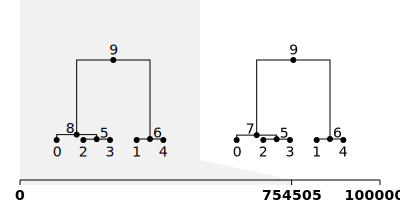

In [19]:
# draw the tree sequence without the unary nodes if you'd like! (there will likely be many fewer trees)
SVG(sts.simplify(keep_unary=False).draw_svg())

## 2. locate children and parents (Pam)

### traversing up a tree

### all edges in the tree sequence

## 3. 2D plotting space trees (Esther)

## 4. 3D plotting (Alex)

# EXTENSIONS

## mutations/selected alleles (Alex)

## discrete space / metapopulations (Pam)

## slendr (fair game!)